In [2]:
import tensorflow as tf
train_path = '/kaggle/input/intel-image-classification/seg_train/seg_train/'
test_path = '/kaggle/input/intel-image-classification/seg_test/seg_test/'

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=42,  
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    batch_size=32,
    image_size=(150, 150),
    seed=42,  
)

Found 14034 files belonging to 6 classes.


2022-07-25 12:40:05.816876: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 3000 files belonging to 6 classes.


In [7]:
class_names =train_data.class_names

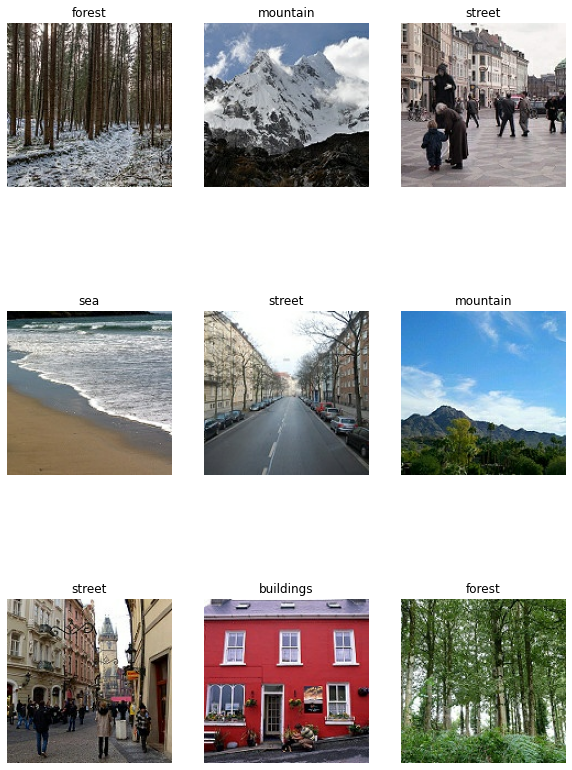

In [8]:
import matplotlib.pyplot as plt
import numpy 

plt.figure(figsize=(10,15))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')


In [9]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model_1.summary()

In [14]:
import keras
from tensorflow.keras import layers
num_classes = 6

inputs = layers.Input(shape =(150, 150, 3))
normalized = normalization_layer(inputs)
x = layers.Conv2D(32, 3, activation='relu')(normalized)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32, 3, activation='relu')(x) 
x = layers.MaxPooling2D()(x)
print(x.shape)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(num_classes)(x)
model_1 = keras.Model(inputs, outputs)

(None, 17, 17, 32)


In [15]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248  

In [17]:
#Compiling model
model_1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [19]:
history_1 = model_1.fit(
  train_data,
  validation_data=test_data,
  epochs=5
)

Epoch 1/5
439/439 [==============================] - 99s 226ms/step - loss: 0.6847 - accuracy: 0.7451 - val_loss: 0.5924 - val_accuracy: 0.7923
Epoch 2/5
439/439 [==============================] - 91s 207ms/step - loss: 0.5167 - accuracy: 0.8102 - val_loss: 0.5497 - val_accuracy: 0.8123
Epoch 3/5
439/439 [==============================] - 91s 208ms/step - loss: 0.4046 - accuracy: 0.8543 - val_loss: 0.6409 - val_accuracy: 0.7843
Epoch 4/5
439/439 [==============================] - 90s 206ms/step - loss: 0.3388 - accuracy: 0.8789 - val_loss: 0.7074 - val_accuracy: 0.7740
Epoch 5/5
439/439 [==============================] - 91s 208ms/step - loss: 0.2577 - accuracy: 0.9062 - val_loss: 0.7371 - val_accuracy: 0.7753
